# CP - Final - 2021

## Instruction

- Modify this file to be Final-<Your FirstName-[First Letter of Last Name]>, e.g., <code>Final-Chaklam-S.ipynb</code>
- This exam is open-booked; open-internet.
- You ARE NOT allowed to use sklearn or pytorch libraries, unless stated.
- The completed exams shall be submitted at the Google Classroom
- All code should be **complemented with comments**, unless it's really obvious.  **We reserve the privilege to give you zero for any part of the question where the benefit of doubt is not justified**

## Examination Rules:
- You may leave the room temporarily with the approval and supervision of the proctors. No extra time will be added to the exam in such cases.
- You are required to turn on your webcam during the entire period of the exam time
- Students will be allowed to leave at the **earliest 45 minutes** after the exam has started
- **All work should belong to you**.  A student should NOT engage in the following activities which proctors reserve the right to interpret any of such act as academic dishonesty without questioning:
    - Chatting with any human beings physically or via online methods
    - Plagiarism of any sort, i.e., copying from friends.  **Both copee and copier shall be given a minimum penalty of zero mark for that particular question or the whole exam.**
- No make-up exams are allowed.  Special considerations may be given upon a valid reason on unpredictable events such as accidents or serious sickness.

In [ ]:
import numpy as np
import torch
import torchvision
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import math
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import random 
from collections import Counter

from sklearn.model_selection import train_test_split

1. Generate a 4 class 2d-data with 70000 samples. (10 points)
- Class 0 data is sampled from a normal distribution with mean = 0, std = 1, size = (28,28) 
- Class 1 data is sampled from a normal distribution with mean = 5, std = 1, size = (28,28) 
- Class 2 data is sampled from a normal distribution with mean = 15, std = 1, size = (28,28) 
- Class 3 data is sampled from a normal distribution with mean = 20, std = 1, size = (28,28) 

The final shape of x should be (70000, 1, 28, 28) and y should be (70000,)

In [ ]:
class Dataset():
    def __init__(self, num_sample = 70000, num_classes = 4):
        self.num_sample = num_sample
        self.num_classes = num_classes
        self.x = torch.empty(self.num_sample,1,28,28)
        self.y = [int(random.randrange(0, self.num_classes)) for _ in range(self.num_sample)]
        # print(Counter(self.y).keys())
        # print(Counter(self.y).values())
        self.y = torch.Tensor(self.y) 
        print("X shape: ", self.x.shape, "y shape: ", self.y.shape)
        for i in range(self.num_sample):
            if self.y[i] == 0:
                self.x[i,:,:,:] = torch.normal(mean=0, std=1, size = (28,28))
            elif self.y[i] == 1:
                self.x[i,:,:,:] = torch.normal(mean=5, std=1, size = (28,28))
            elif self.y[i] == 2:
                self.x[i,:,:,:] = torch.normal(mean=15, std=1, size = (28,28))
            else:
                self.x[i,:,:,:] = torch.normal(mean=20, std=1, size = (28,28))

        self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In case you are unable to do question 1, Use the following lines of code to generate your data and continue with question 3. But be aware that no marks will be given to question 1 and question 2

In [ ]:
import torchvision
training_data = torchvision.datasets.MNIST('./data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ]))

testing_data  = torchvision.datasets.MNIST('./data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ]))

datasets = {}
datasets['train'] = training_data
datasets['test'] = testing_data

2. Split your data into train and test with the split ratio of 0.2

In [ ]:
from torch.utils.data import Subset
def train_test_dataset(dataset, split=0.20):
    train_idx, test_idx = train_test_split(list(range(len(dataset))), test_size=split)
    datasets = {}
    datasets['train'] = Subset(dataset, train_idx)
    datasets['test'] = Subset(dataset, test_idx)
    return datasets

dataset = Dataset(num_sample = 70000)
datasets = train_test_dataset(dataset, split = 1/7)

X shape:  torch.Size([70000, 1, 28, 28]) y shape:  torch.Size([70000])


3. Check the size of your train and test set

In [ ]:
print("Number of training samples: ",len(datasets['train']))
print("Number of testing samples: ",len(datasets['test']))


Number of training samples:  60000
Number of testing samples:  10000


4. Set up your train and test loader with a batch size of 32 and shuffle = True.

In [ ]:
batch_size = 32
train_loader = DataLoader(datasets['train'], batch_size=batch_size, shuffle=True)
test_loader = DataLoader(datasets['test'], batch_size=batch_size, shuffle=True)

In [ ]:
loaders = {'train': train_loader, 'test': test_loader }

5. Check the shape of your batch. It should be [batchsize = 32, channel = 1, height = 28, width = 28]

In [ ]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [ ]:
example_data.shape

torch.Size([32, 1, 28, 28])

6. Plot 6 samples. 

torch.Size([1, 28, 28]) torch.Size([])
torch.Size([1, 28, 28]) torch.Size([])
torch.Size([1, 28, 28]) torch.Size([])
torch.Size([1, 28, 28]) torch.Size([])
torch.Size([1, 28, 28]) torch.Size([])
torch.Size([1, 28, 28]) torch.Size([])


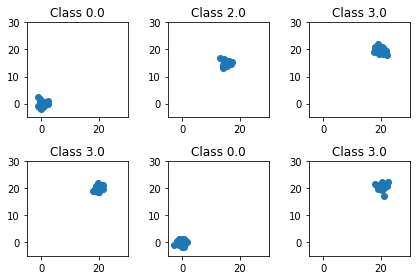

In [ ]:
fig = plt.figure()

def get_image(x, y):
    print(x.shape, y.shape)
    plt.tight_layout()
    plt.scatter(x[:,:,0],x[:,:,1])
    plt.title(f"Class {y}")
    plt.xlim([-5,30])
    plt.ylim([-5,30])

for i in range(len(dataset)):
    x, y = datasets['train'][i]
    ax = plt.subplot(2, 3, i + 1)
    ax.set_title('Sample #{}'.format(i))
    get_image(x,y)
    if i == 5:
        plt.show()
        break

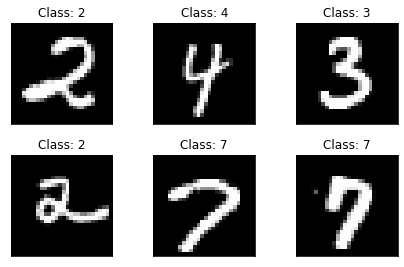

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Class: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])



7. Configure your device.

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

8. Define your class called Net with the following layers
- cnn2d layer 1 with in_channel = 1, out_channel = 10, kernel size of 5, dropout of p = 0.5 maxpool and relu as its activation function
- cnn2d layer 2 with in_channel = 10, out_channel = 20, kernel size of 5, dropout of p = 0.5 maxpool and relu as its activation function
- linear layer with output of 25
- lstm with num_layer = 2 and set hidden size to be num_classes




In [ ]:
class Net(nn.Module):
    def __init__(self, num_class, num_layers, num_classes):
        super(Net, self).__init__()
        # CNN2d
        self.num_classes = num_classes
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv1_drop = nn.Dropout2d(p = 0.5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d(p = 0.5)
        self.fc1 = nn.Linear(320, 25)

        #LSTM
        self.hidden_size = num_classes
        self.num_layers = num_layers
        self.input_size = 5
        self.sequence_length = 5
        
        self.lstm = nn.LSTM(self.input_size, self.hidden_size, self.num_layers, batch_first=True) 

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1_drop(self.conv1(x)), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        # out = x
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        x = x.reshape(-1, self.sequence_length, self.input_size).to(device)
        out, hidden = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        out = out[:, -1, :]
        return out
      

9. Create an model object with num_layers = 2, hidden_size = 64, num_classes = 4

If you use MNIST hidden_size and num_classes = 10

In [ ]:
num_layers = 2
num_classes = 4
model = Net(num_classes, num_layers, num_classes).to(device)
print(model)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv1_drop): Dropout2d(p=0.5, inplace=False)
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=25, bias=True)
  (lstm): LSTM(5, 4, num_layers=2, batch_first=True)
)


10. Define an appropriate loss function for classification of this dataset

In [ ]:
loss_func = nn.CrossEntropyLoss()

11. Define your optimizer as Adam with learning rate of 0.001.

In [ ]:
from torch import optim
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr = learning_rate)   

12. Train your model with n_epoch = 3

In [ ]:
def train(num_epochs, model, loaders):
    print(f"num_epochs: {num_epochs}")
    print(f"model: {model}")
    print(f"loaders['train']: {loaders['train']}")
    print("Started epoch: ")
    losses = []
    accs = []
    model.train()
    total_step = len(loaders['train'])
    for epoch in range(num_epochs):
        correct = 0
        total = 0
        loss = 0
        for i, (inputs, targets) in enumerate(loaders['train']):
            inputs = inputs.to(device)
            targets = targets.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total = total + targets.size(0)
            correct = correct + (predicted == targets).sum().item()
            
            loss = loss_func(outputs, targets.long())
            loss += loss

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item())) 
         
        accs.append(100 * correct / total)   
        losses.append(loss / total)
    print("Done!")
    return losses, accs

In [ ]:
num_epochs = 3
losses, accs = train(num_epochs, model, loaders)

num_epochs: 3
model: Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv1_drop): Dropout2d(p=0.5, inplace=False)
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=25, bias=True)
  (lstm): LSTM(5, 4, num_layers=2, batch_first=True)
)
loaders['train']: <torch.utils.data.dataloader.DataLoader object at 0x7f22db1c3350>
Started epoch: 
Epoch [1/3], Step [100/1875], Loss: 2.7407
Epoch [1/3], Step [200/1875], Loss: 2.7361
Epoch [1/3], Step [300/1875], Loss: 2.5388
Epoch [1/3], Step [400/1875], Loss: 2.5938
Epoch [1/3], Step [500/1875], Loss: 2.3819
Epoch [1/3], Step [600/1875], Loss: 2.2306
Epoch [1/3], Step [700/1875], Loss: 2.1422
Epoch [1/3], Step [800/1875], Loss: 2.2707
Epoch [1/3], Step [900/1875], Loss: 1.9539
Epoch [1/3], Step [1000/1875], Loss: 2.1284
Epoch [1/3], Step [1100/1875], Loss: 2.0494
Epoch [1/3], Step [1200/1875], Loss: 2.0679
Epoch [1/3], Step [130

13. Plot your train losses and accuracies

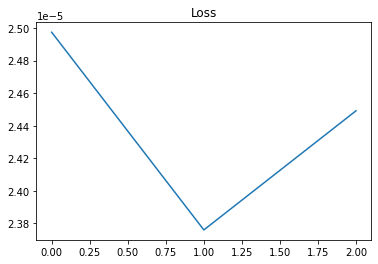

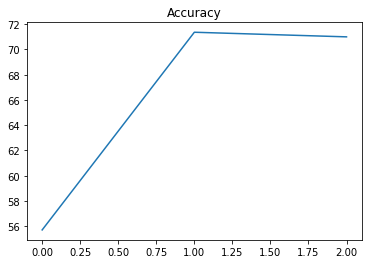

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Loss")
plt.show()
plt.plot(accs)
plt.title("Accuracy")
plt.show()

14. Evaluate your model

In [ ]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, targets in loaders['test']:
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model(inputs)
        predicted = torch.argmax(outputs, dim = 1)
        total = total + targets.size(0)
        correct = correct + (predicted == targets).sum().item()
print('Test Accuracy of the model on the 10000 test set: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test set: 74.44 %
